# This code is the basic code that was used for the efficiency determination in the paper "Establishing an automated heat-source calibration framework, Rissaki et al, 2023"

# With some modifications, it could be used for automatic efficiency determination of any welding case

# Please read through the code and if you have any questions contact Dimitra Rissaki by email dimrissaki@gmail.com


In [ ]:
#import required libraries
import csv
import pandas as pd
import glob
import os
import math
import matplotlib.pyplot as plt
import decimal
from decimal import Decimal
import numpy as np
from IPython.display import clear_output
import time

# Read experimental TC data

In [ ]:
#read experimental TC data (change the path accordingly)
exp_data = pd.read_csv(r"/Users/dimitra/Dropbox (The University of Manchester)/Dimitra_Rissaki/07_Research/01_Heat_Source_Calibration_Exploration/efficiency exploration/1st_pass/D-TCS.csv")
exp_data


# Read simulation TC data

In [ ]:
#values of efficiency of the exploration as percentage
efficiency = [10,20,30,40,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]
#values of efficiency of the exploration as decimals
efficiency = [x / 100 for x in efficiency]
#values of efficiency of the exploration having two decimals each
efficiency = [ '%.2f' % elem for elem in efficiency ]
efficiency = [Decimal(i) for i in efficiency]

filename_list = []
for i in efficiency:
    filename = "S-TCS_" + str(i) + ".csv"
    filename_list.append(filename)
    

In [ ]:
# path of simulation files (change the path accordingly)
path = "/Users/dimitra/Dropbox (The University of Manchester)/Dimitra_Rissaki/07_Research/01_Heat_Source_Calibration_Exploration/efficiency exploration/1st_pass/radii_10_10_10/FEAT_output_files"

# create an empty list to store the raw files
raw_files = []

for f in filename_list:
    # read the csv file
    print (path + "/" + f)
    df = pd.read_csv(path + "/" + f)
        
    # save the csv file to the list
    raw_files.append(df)

    # print filename
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print() 


In [3]:
# for each far-field thermocouple calculate:
# - its initial temperature
# - its maximum temperature
# - the difference of initial and maximum temperatures

# create empty lists
TC1_max_sim_list = []
TC1_init_sim_list = []
dif_TC1_sim_list = []

#loop over the 'raw_files' list
for i in raw_files:
    
    #calculate differences between maximum and minimum temperature for each file of different efficiency
    TC1_max_sim = i['S-TC1'].max()
    TC1_init_sim = i[i>0]['S-TC1'].min() # be careful because the minimum themperature might not be equal to the initial in your case
    dif_TC1_sim = TC1_max_sim - TC1_init_sim
    
    #save outputs in lists
    TC1_max_sim_list.append(TC1_max_sim)
    TC1_init_sim_list.append(TC1_init_sim)
    dif_TC1_sim_list.append(dif_TC1_sim)
    

# Calculate RMSE

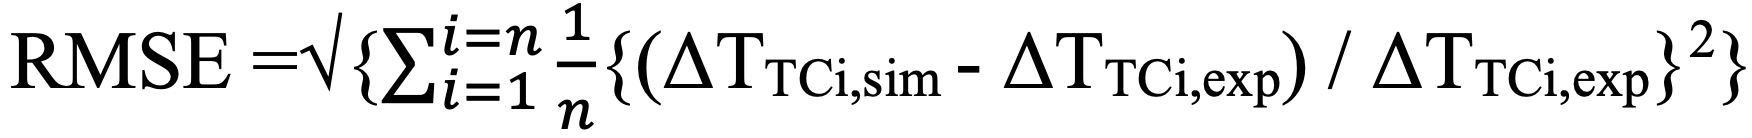

In [ ]:
# create empty list
RMS_list = []

#calculation of RMS for all efficiencies
for i in range(len(dif_TC1_sim_list)):
    # modify accordingly to include all far-field thermocouples
    RMS = math.sqrt(((dif_TC1_sim_list[i] - dif_TC1_exp)/dif_TC1_exp)**2)
    RMS_list.append(RMS)
    

In [ ]:
# plot the efficiency-RMSE curve
plt.plot(efficiency,RMS_list,'bo')
plt.xlabel('efficiency')
plt.ylabel('RMSE')

In [ ]:
# minimum RMSE
min_RMS = min(RMS_list)
print(min_RMS)

In [ ]:
# efficiency that gives minimum RMSE
min_index = RMS_list.index(min_RMS)
efficiency[min_index]